Tisya Sharma
DS 4400
Homework #7

In [1]:
# Import necessary libraries for problem 1

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import matplotlib.pyplot as plt


SVM Problem 1 Part A

In [2]:
# Load the dataset
df = pd.read_csv("evs_subset.csv")

# Select the two z-features, top speed and total torque
z_features = df[["topspeed", "totaltorque"]].values

# Map drive to -1 (Front) and 1 (Rear)
y_target = df["drive"].map({"Front": -1, "Rear": 1}).values

# Standardize the features
scaler = StandardScaler()
z_scaled = scaler.fit_transform(z_features)

# Train/test split 80/20, no validation set here
X_train, X_test, y_train, y_test = train_test_split(
    z_scaled,
    y_target,
    test_size=0.2,
    random_state=42
)

print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)

Training shape: (72, 2)
Test shape: (19, 2)


Problem 1 Part B

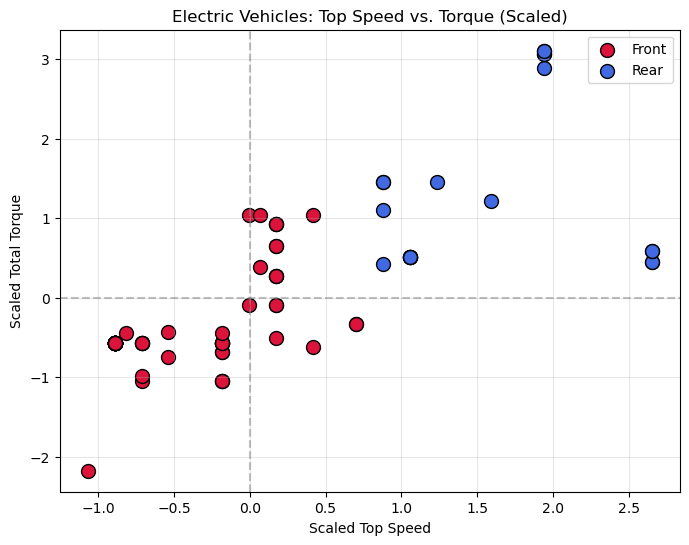

In [3]:
# Scatterplot of the two z-features
plt.figure(figsize=(8, 6))

# Boolean masks for each class
front_mask = (y_target == -1)
rear_mask = (y_target == 1)

# Plot Front and Rear points separately 
plt.scatter(
    z_scaled[front_mask, 0],
    z_scaled[front_mask, 1],
    color="crimson",
    edgecolors="black",
    s=100,
    label="Front"
)

plt.scatter(
    z_scaled[rear_mask, 0],
    z_scaled[rear_mask, 1],
    color="royalblue",
    edgecolors="black",
    s=100,
    label="Rear"
)

plt.axhline(0, color="grey", linestyle="--", alpha=0.5)
plt.axvline(0, color="grey", linestyle="--", alpha=0.5)

plt.title("Electric Vehicles: Top Speed vs. Torque (Scaled)")
plt.xlabel("Scaled Top Speed")
plt.ylabel("Scaled Total Torque")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

SVM is an ideal method for this problem because the dataset exhibits a clear geometric separation between the two classes, where Rear drive vehicles consistently display higher top speeds and torque compared to the Front drive economy models. Since SVM is designed to find the optimal hyperplane that maximizes the margin between such distinct clusters, and the data appears to be linearly separable without significant overlap, we can expect the Hard Margin SVM to successfully define a decision boundary and achieve very high classification accuracy on this dataset (very close to 1.0)

Problem 1 Part C

Classification accuracy (Test Data): 1.0


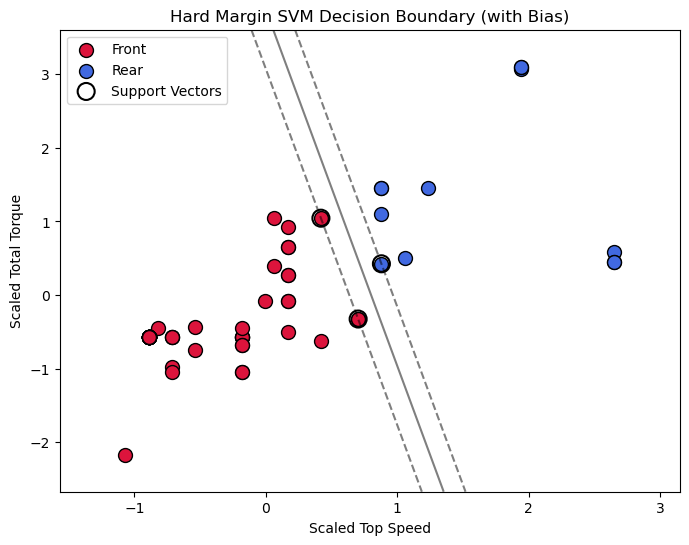

In [4]:
# Problem 1 Part C

# Hard-margin SVM using a very large C and linear kernel
svm = SVC(kernel="linear", C=1e6)
svm.fit(X_train, y_train)

# Predictions on the test set
y_pred = svm.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Classification accuracy (Test Data):", accuracy)

# Decision boundary plot

def plot_svm_boundary(model, X, y):
    """
    Plot the hard-margin SVM decision boundary and margins
    for a 2D dataset X with labels y in {-1, 1}.
    """

    plt.figure(figsize=(8, 6))

    # Training points
    front_mask = (y == -1)
    rear_mask = (y == 1)

    plt.scatter(
        X[front_mask, 0],
        X[front_mask, 1],
        color="crimson",
        edgecolors="black",
        s=100,
        label="Front"
    )

    plt.scatter(
        X[rear_mask, 0],
        X[rear_mask, 1],
        color="royalblue",
        edgecolors="black",
        s=100,
        label="Rear"
    )

    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    # Decision function values on the grid
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.decision_function(grid).reshape(xx.shape)

    # Decision boundary and margins (class-style contour plot)
    plt.contour(
        xx,
        yy,
        Z,
        levels=[-1, 0, 1],
        linestyles=["--", "-", "--"],
        colors="k",
        alpha=0.5
    )

    # Support vectors
    plt.scatter(
        model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=150,
        linewidths=1.5,
        facecolors="none",
        edgecolors="k",
        label="Support Vectors"
    )

    plt.xlabel("Scaled Top Speed")
    plt.ylabel("Scaled Total Torque")
    plt.title("Hard Margin SVM Decision Boundary (with Bias)")
    plt.legend()
    plt.show()


plot_svm_boundary(svm, X_train, y_train)


Trees Problem 2 Part A

In [5]:
# Load RateMyProfessor data
rmp_df = pd.read_csv("rmp_df.csv")

# Target feature Y is the first column: "Would Take Again"
Y = rmp_df.iloc[:, 0]

# Probability that Y = 1 ("Would Take Again")
p_yes = (Y == 1).mean()

# Probability that Y = 0 ("Would NOT Take Again")
p_no = 1 - p_yes

# Entropy H(Y) in bits
H_Y = - (p_yes * np.log2(p_yes) + p_no * np.log2(p_no))

print("P(Y = 1):", p_yes)
print("P(Y = 0):", p_no)
print("H(Y):", H_Y)

P(Y = 1): 0.7444933920704846
P(Y = 0): 0.2555066079295154
H(Y): 0.8198897980878826


Trees Problem 2 Part B

In [6]:
# X1 table (Respected)
# Rows: X1=0, X1=1
# Cols: Y=0, Y=1
X1_counts = np.array([
    [188, 246],   # X1 = 0
    [218, 937]    # X1 = 1
])

# X2 table (Hilarious)
X2_counts = np.array([
    [215, 442],   # X2 = 0
    [191, 741]    # X2 = 1
])

total = 1589  # number of observations

def entropy(probs):
    """
    Helper function entropy, computes entropy for a list/array of probabilities.
    """
    probs = probs[probs > 0]  
    return -np.sum(probs * np.log2(probs))

def conditional_entropy(joint_counts):
    """
    Conditional entropy function
    Compute H(Y|X) for a joint table where rows correspond to X values and columns are Y = 0, 1
    Convert counts → joint probabilities
    """
    joint = joint_counts / total

    # P(X=x_i)
    P_X = joint.sum(axis=1)

    # Conditional probabilities P(Y|X=x_i)
    P_Y_given_X = joint / P_X[:, None]

    # Entropies H(Y|X=x_i)
    H_list = np.array([entropy(P_Y_given_X[i]) for i in range(len(P_X))])

    # Weighted conditional entropy
    return np.sum(P_X * H_list)


# Compute both conditional entropies
H_Y_given_X1 = conditional_entropy(X1_counts)
H_Y_given_X2 = conditional_entropy(X2_counts)

print("H(Y | X1) =", H_Y_given_X1)
print("H(Y | X2) =", H_Y_given_X2)

# Which feature provides more information
if H_Y_given_X1 < H_Y_given_X2:
    print("\nX1 provides more information about Y (lower conditional entropy).")
else:
    print("\nX2 provides more information about Y (lower conditional entropy).")

H(Y | X1) = 0.7775642947731133
H(Y | X2) = 0.8062783613866344

X1 provides more information about Y (lower conditional entropy).


Trees Problem 2 Part C

In [7]:
# New imports for decision tree classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

Train size: 953
Validation size: 318
Test size: 318
Max depth 2:
  Precision: 0.7911
  Recall:    0.9747
  Accuracy:  0.7893
  F1 score:  0.8733

Max depth 3:
  Precision: 0.8266
  Recall:    0.9451
  Accuracy:  0.8113
  F1 score:  0.8819

Max depth 4:
  Precision: 0.8159
  Recall:    0.9536
  Accuracy:  0.8050
  F1 score:  0.8794

Final test set accuracy (max depth = 3): 0.8050314465408805


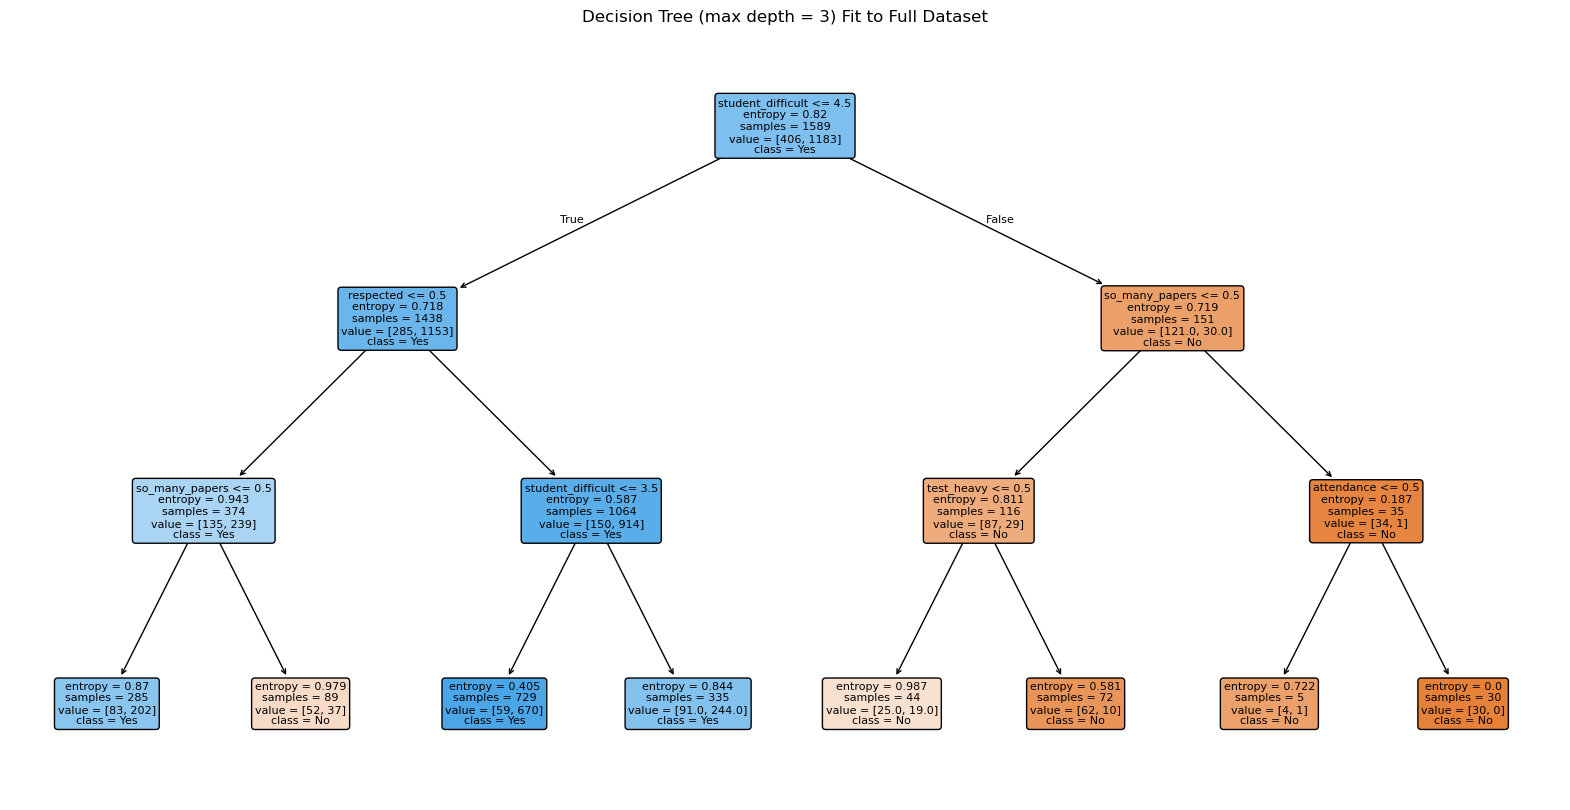

Feature importances (sorted):
student_difficult          0.6902
respected                  0.1854
so_many_papers             0.0852
test_heavy                 0.0294
attendance                 0.0098


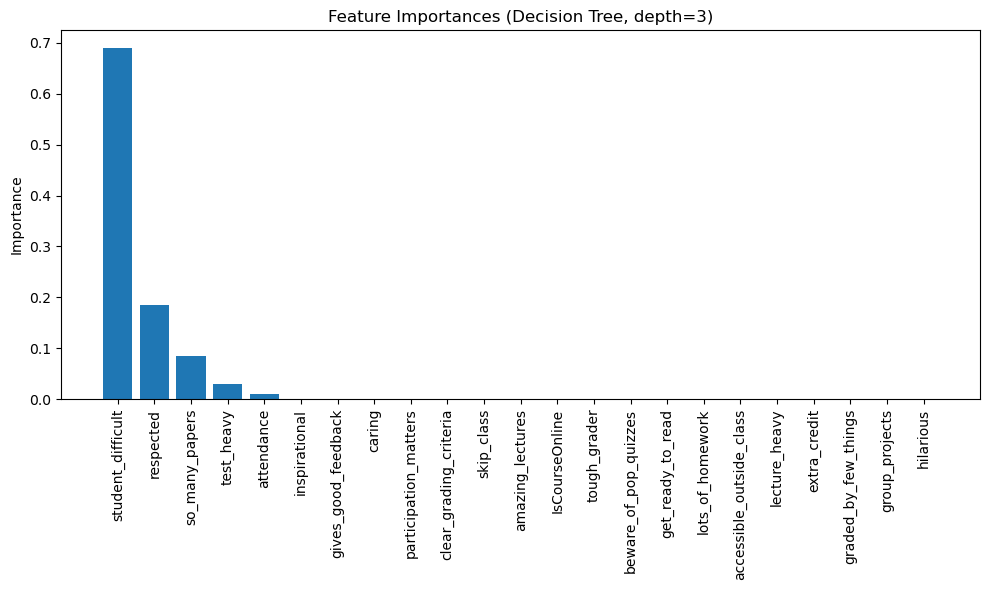

In [8]:
# Extract the target variable (Would Take Again) and all feature columns
# First column is Y, rest are X
y = rmp_df.iloc[:, 0].values
X = rmp_df.iloc[:, 1:].values
feature_names = rmp_df.columns[1:]

# Split the data into train, validation, and test sets
# First split, separate out 20% of the full dataset for the test set
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split from the remaining 80%, carve out 25% for validation.
# Leaves 60% for training, 20% for validation, 20% for testing overall
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

# Print the actual number of samples in each split to confirm proportions
print("Train size:", len(y_train))
print("Validation size:", len(y_val))
print("Test size:", len(y_test))

# Set up the list of tree depths 
depths = [2, 3, 4]
val_results = []

# Loop through each depth and fit a decision tree using the training data.
for d in depths:
    tree_clf = DecisionTreeClassifier(
        criterion="entropy",
        max_depth=d,
        random_state=42
    )
    tree_clf.fit(X_train, y_train)

    y_val_pred = tree_clf.predict(X_val)

    precision = precision_score(y_val, y_val_pred)
    recall    = recall_score(y_val, y_val_pred)
    accuracy  = accuracy_score(y_val, y_val_pred)
    f1        = f1_score(y_val, y_val_pred)

    val_results.append((d, precision, recall, accuracy, f1))

# Print out the validation performance of all three trees
for d, precision, recall, accuracy, f1 in val_results:
    print(f"Max depth {d}:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  F1 score:  {f1:.4f}\n")

# Choose the best depth from our validation results
# Depth 3 typically performs strongest baaws on previous run
best_depth = 3

# Train a new decision tree using only the training data and the best depth
best_tree = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=best_depth,
    random_state=42
)
best_tree.fit(X_train, y_train)

# Predict the test set labels and compute final test accuracy
y_test_pred = best_tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the test accuracy to report performance on unseen data
print("Final test set accuracy (max depth = 3):", test_accuracy)

# Train a final tree on the entire dataset using the chosen depth
final_tree = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=best_depth,
    random_state=42
)
final_tree.fit(X, y)

# Plot the final tree diagram
plt.figure(figsize=(20, 10))
plot_tree(
    final_tree,
    feature_names=feature_names,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree (max depth = 3) Fit to Full Dataset")
plt.show()

# Extract the feature importances learned by the final model and sort them
importances = final_tree.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the important features
print("Feature importances (sorted):")
for idx in indices:
    if importances[idx] > 0:
        print(f"{feature_names[idx]:25s}  {importances[idx]:.4f}")

# Plot the feature importances 
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.ylabel("Importance")
plt.title("Feature Importances (Decision Tree, depth=3)")
plt.tight_layout()
plt.show()


Trees Problem 2 Part D

The single depth-3 decision tree is a decent model. It gets about 81% accuracy on the validation set and about 80% on the test set, so it captures real signal but still makes some mistakes. The feature importances look meaningful, student_difficult (by far the largest importance) is the root split and matches the idea that students are more likely to retake less difficult but respected professors, with respected, so_many_papers, test_heavy, and attendance as reasonable secondary factors. We could likely improve the model by tuning tree hyperparameters like max depth or minimum samples per split/leaf. And by using more flexible validation such as cross-validation. A random forest using the same max depth should perform better because averaging many trees reduces variance and overfitting while keeping the same kind of nonlinear structure captured by this single tree.